## 求方程组
module1：`np.linalg.solve`  
module2:`scipy.optimize.root`  
总结：
1.线性方程组用numpy.linalg.solve足矣。(实数域复数域都可以)<br>
2.求解非线性方程组，如果存在求根公式的且未知量数目较少的方程组，可以用sympy求。  
如果是很复杂的方程组，用scipy.optimize.root数值求解，最好写出雅可比矩阵以提高运算速度。(懒得写雅可比矩阵，就设置参数method=‘krylov’，解起来速度也很快，只不过精度不高)。

In [ ]:
# 线性方程组Ax=b
import numpy as np
a=np.mat('1,2,3;2,4,8;9,6,3')
b=np.mat('1;1;3')
c=np.linalg.solve(a,b)

In [ ]:
# 复数域的线性方程组
import numpy as np
a=np.mat('1,-1j;1j,-1')
b=np.mat('1;1')
c=np.linalg.solve(a,b)

In [ ]:
# 非线性方程组
from scipy.optimize import root

def f1(x):
   return [x[0]+x[0]*x[1]-2,x[0]-x[1]-2]

#初始猜测值[0,-1]   
print(root(f1,[0,-1]).x)
#初始猜测值[0,0]
print(root(f1,[0,0]).x)


In [ ]:
from numpy import array,mat,sin,cos,exp
from scipy.optimize import root

def f(x):
    eqs=[]
    eqs.append(x[0]*x[1]+x[1]*x[2]+sin(x[0])*exp(x[1])+x[1])
    eqs.append(x[0]*x[1]-exp(x[0])*x[1]+1)
    eqs.append(x[1]*x[2]+exp(x[1])*x[2]+1) 
    return eqs

# 方程组对应的雅可比矩阵 加快运行速度
def jac1(x):
    return mat([[x[1]+cos(x[0])*exp(x[1]), x[0]+x[2]+sin(x[0])*exp(x[1])+1, x[1]],
                [x[1]-exp(x[0])*x[1], x[0]-exp(x[0]), 0],
                [0 ,x[2]+exp(x[1])*x[2], x[1]+exp(x[1])]])

print(root(f,[0,0,0]).x)
print(root(f,[0,0,0],jac=jac1).x)


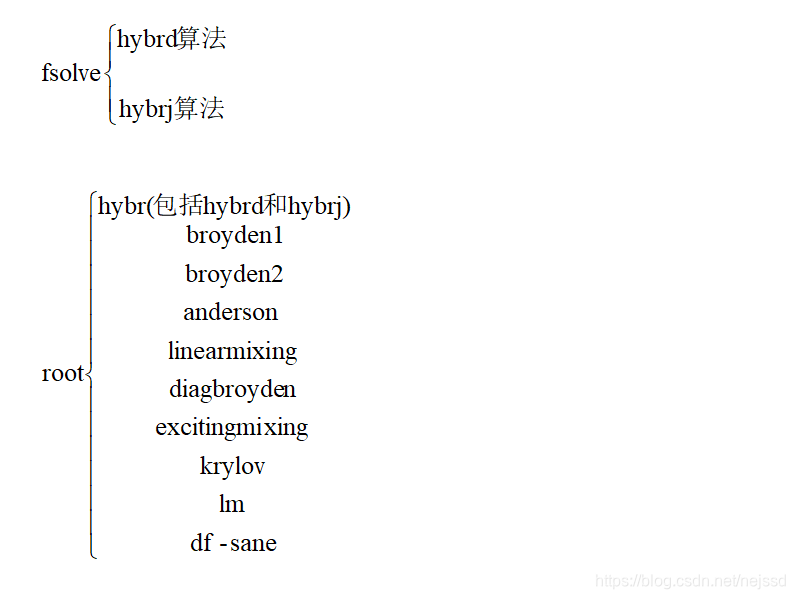

In [ ]:
# 非线性方程组()
from scipy.optimize import fsolve
from numpy import array,mat

def f1(x):
  return [x[0]+x[0]*x[1]-2,x[0]-x[1]-2]

#方程组对应的雅可比矩阵
def jac1(x):
  return mat([[1+x[1],x[0]],[1,-1]])

print(fsolve(f1,[0,-1]))#初始猜测值[0,-1]
print(fsolve(f1,[0,-1],fprime=jac1))#初始猜测值[0,-1],并设置参数prime
print(fsolve(f1,[0,0]))#初始猜测值[0,0]
print(fsolve(f1,[0,0],fprime=jac1))#初始猜测值[0,0],并设置参数prime


In [ ]:
from scipy.integrate import odeint

help(odeint)